In [1]:
import pandas as pd

train_labels = pd.read_csv("../input/train_labels.csv")

In [2]:
train_labels

,row_id,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
0,0,tomo_003acc,-1.0,-1.0,-1.0,500,1912,1847,6.5,0
1,1,tomo_00e047,169.0,546.0,603.0,300,959,928,15.6,1
2,2,tomo_00e463,235.0,403.0,137.0,500,924,956,19.7,6
3,3,tomo_00e463,243.0,363.0,153.0,500,924,956,19.7,6
4,4,tomo_00e463,222.0,379.0,144.0,500,924,956,19.7,6
...,...,...,...,...,...,...,...,...,...,...
732,732,tomo_fe050c,138.0,134.0,542.0,300,959,928,15.6,1
733,733,tomo_fe85f6,-1.0,-1.0,-1.0,800,928,960,13.1,0
734,734,tomo_fea6e8,-1.0,-1.0,-1.0,300,960,928,16.8,0
735,735,tomo_ff505c,111.0,816.0,678.0,300,959,928,15.6,1


In [3]:
train_labels["has motor"] = (
    train_labels[["Motor axis 0", "Motor axis 1", "Motor axis 2"]].sum(axis=1) != -3
)

train_labels.groupby("tomo_id").agg({"has motor": lambda x: x.nunique() == 1}).all()

has motor    True
dtype: bool

I0000 00:00:1744062372.172693   75843 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9312 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6


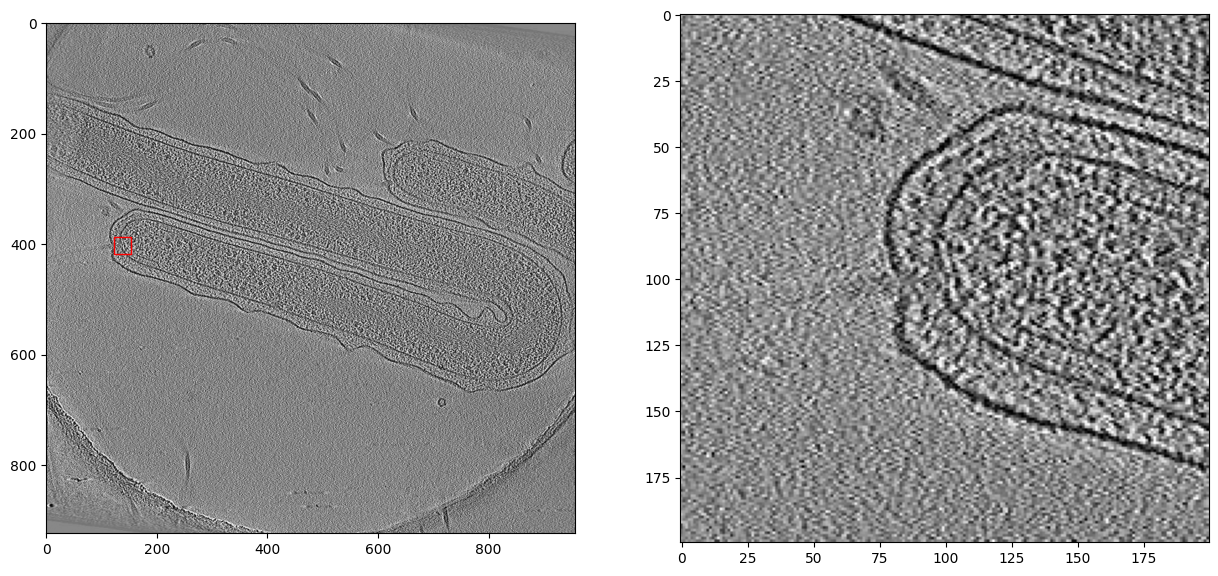

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf

tomo = train_labels.loc[train_labels["has motor"] == True].iloc[1]


def plot_motor(
    tomo_id="tomo_00e463", motor_axis_2=603, motor_axis_1=546, motor_axis_0=169
):

    motor_axis_2 = int(motor_axis_2)
    motor_axis_1 = int(motor_axis_1)
    motor_axis_0 = int(motor_axis_0)

    fig, axes = plt.subplots(1, 2, figsize=(15, 15))

    image = get_image(tomo_id, z=motor_axis_0)
    axes[0].imshow(
        image,
        cmap="gray",
    )

    axes[0].scatter(
        motor_axis_2,
        motor_axis_1,
        marker="s",
        s=150,
        edgecolors="red",
        facecolors="none",
        linewidths=1,
    )

    motor_image = image.numpy().copy()[
        motor_axis_1 - 100 : motor_axis_1 + 100, motor_axis_2 - 100 : motor_axis_2 + 100
    ]

    axes[1].imshow(
        motor_image,
        cmap="gray",
    )

    plt.show()


def get_image(tomo_id, z=169):
    z = str(z).zfill(4)
    image = tf.io.read_file(f"../input/train/{tomo_id}/slice_{z}.jpg")
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image


plot_motor(
    tomo["tomo_id"], tomo["Motor axis 2"], tomo["Motor axis 1"], tomo["Motor axis 0"]
)